In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [0]:
data = pd.read_csv('bank.csv')

In [7]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
# No missing values for given bank data.

In [9]:
data.CustomerId.unique().size

10000

In [0]:
# We can see 10000 unique values for users which are not usefull for analysis. SO we can drop the CustomerId column.

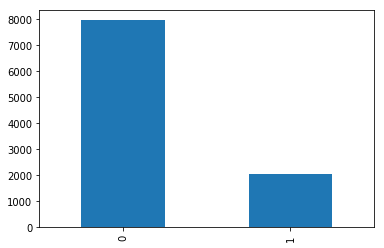

In [11]:
data.Exited.value_counts()
plt.title = "Exited Class Histogram"
plt.xlabel = "Exited"
plt.ylabel = "Frequency"
pd.value_counts(data['Exited']).plot.bar()

In [0]:
# Above Histogram shows that many Bank customer are not leaving (class zero).

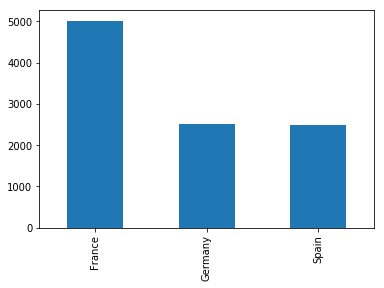

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
data.Geography.value_counts()
plt.title = "Exited Class Histogram"
plt.xlabel = "Geography"
plt.ylabel = "Frequency"
pd.value_counts(data['Geography']).plot.bar()

In [0]:
# More Bank customer are from France rather than Germany and Spain.

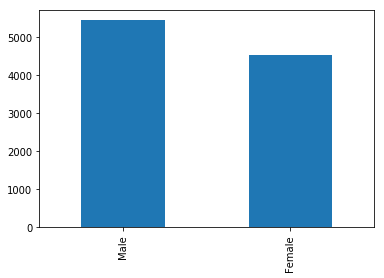

In [13]:
data.Gender.value_counts()
plt.title = "Gender Class Histogram"
plt.xlabel = "Gender"
plt.ylabel = "Frequency"
pd.value_counts(data['Gender']).plot.bar()

In [0]:
# Male Bank customer are more than female.

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,9516.0,650.693148,96.058438,383.00,584.000,652.000,717.000,850.00
Age,9516.0,37.603195,8.621325,18.00,32.000,37.000,43.000,61.00
Tenure,9516.0,5.013976,2.887543,0.00,3.000,5.000,7.000,10.00
Balance,9516.0,76424.863113,62436.839109,0.00,0.000,97041.880,127620.325,250898.09
NumOfProducts,9516.0,1.515868,0.549457,1.00,1.000,1.000,2.000,3.00
HasCrCard,9516.0,0.705759,0.455725,0.00,0.000,1.000,1.000,1.00
IsActiveMember,9516.0,0.502627,0.500019,0.00,0.000,1.000,1.000,1.00
EstimatedSalary,9516.0,100121.828109,57511.671938,11.58,51113.055,100134.325,149461.830,199992.48
Exited,9516.0,0.196511,0.397380,0.00,0.000,0.000,0.000,1.00


In [0]:
# 

In [15]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


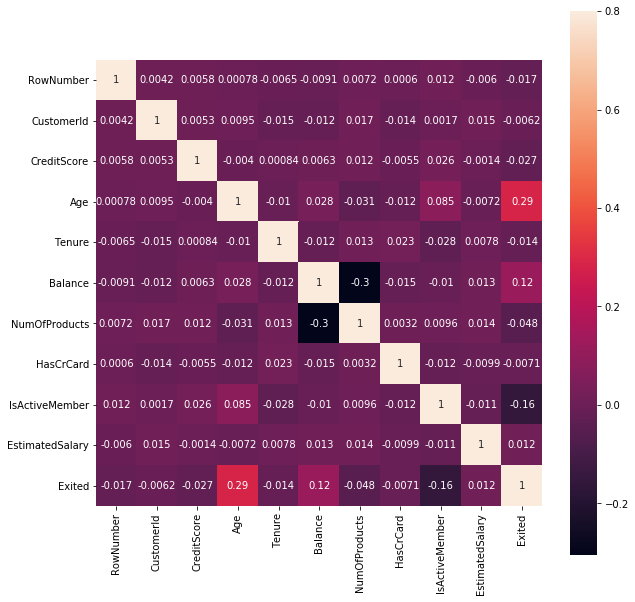

In [16]:
import seaborn as sn
correlationmat = data.corr(method='pearson')
f, ax = plt.subplots(figsize = (10,10))
sn.heatmap(correlationmat, vmax=0.8, square=True, annot=True)

In [17]:
data.drop(columns=['RowNumber','CustomerId', 'Surname'], axis= 1, inplace= True)
data.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


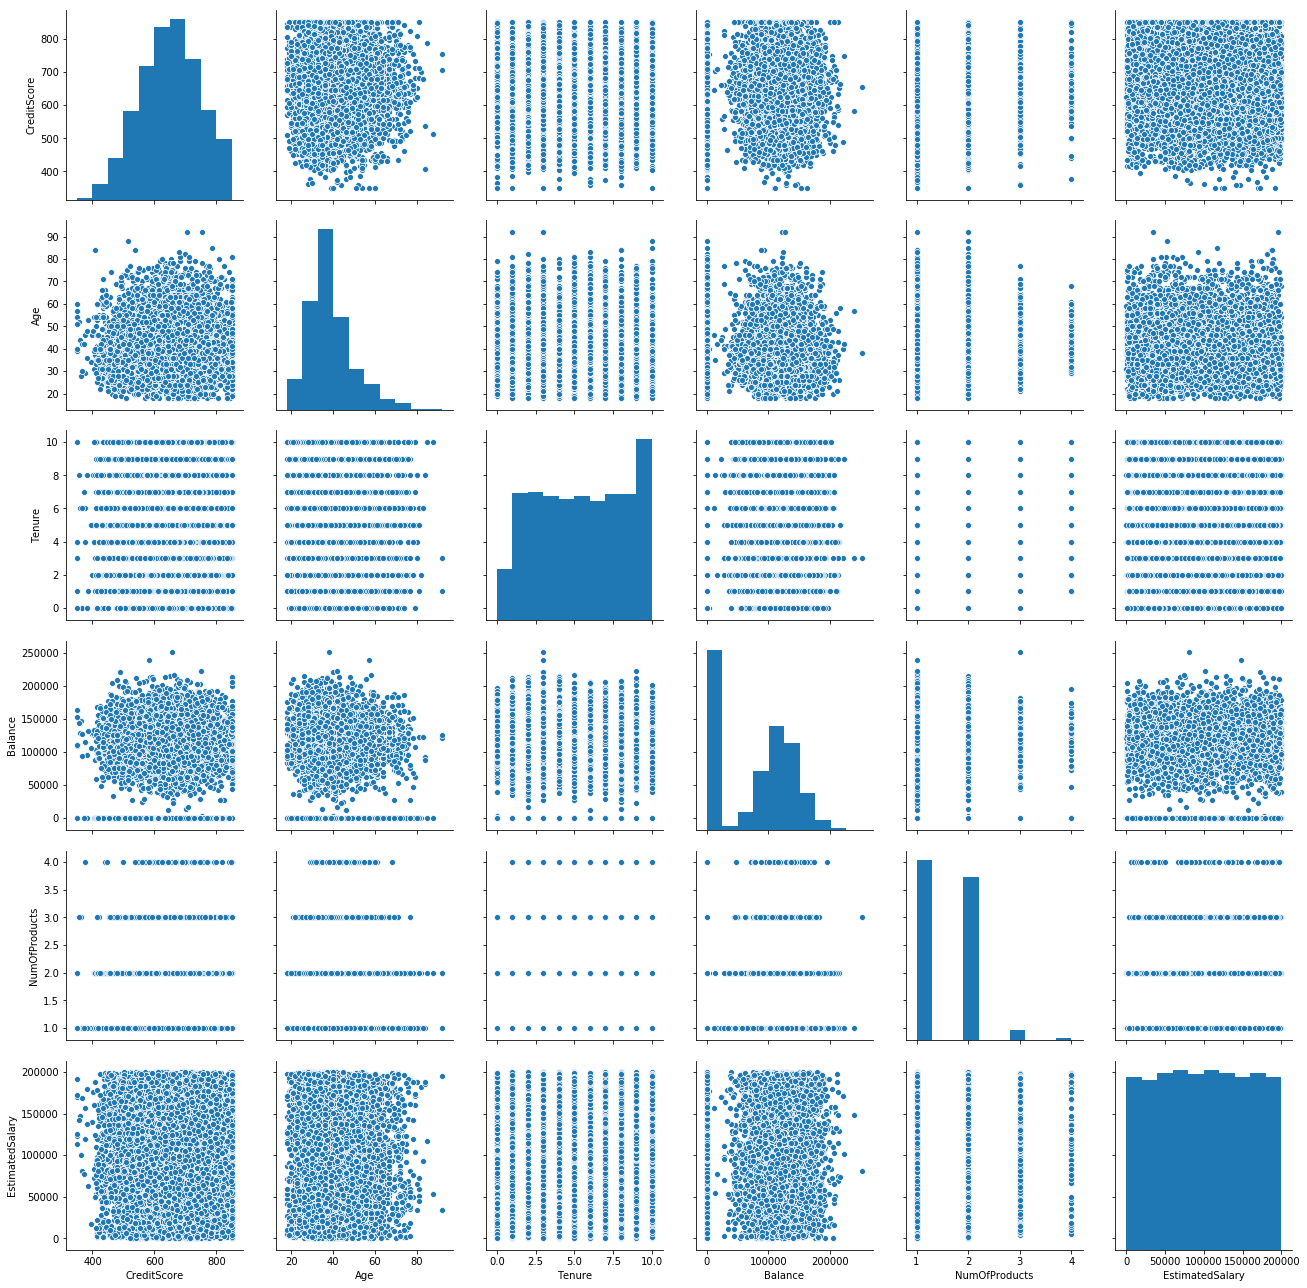

In [19]:
plot_data = data[['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']]
grid = sn.pairplot(data = plot_data, size = 3)

In [0]:
# There is no correlation between features and target

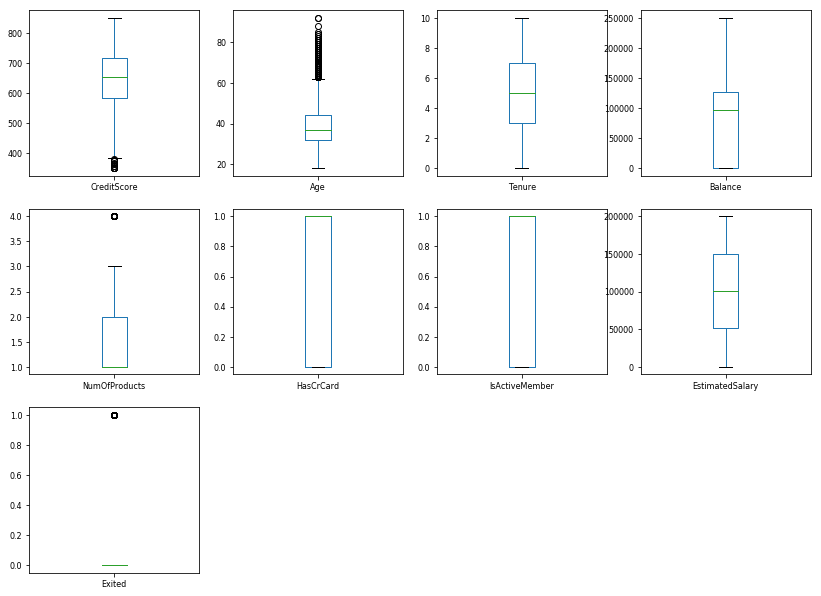

In [20]:
data.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

In [0]:
# In the data Age, CreditScore and NumOfProducts columns has many outliers values. Lets treat outliers.

In [21]:
print("Before",data.shape)
def outlier(col): 
            q3 = data[col].quantile(0.75) 
            q1 = data[col].quantile(0.25) 
            iqr = q3 - q1 
            lowval = q1 - 1.5* iqr 
            highval = q3 + 1.5 * iqr 
            loc_ret = data.loc[(data[col] > lowval) & (data[col] < highval)] 
            return loc_ret      
numeric_subset = data.select_dtypes('number') 

data = outlier('Age')
data = outlier('CreditScore')
data = outlier('NumOfProducts')
print("After",data.shape)

Before (10000, 11)
After (9516, 11)


In [0]:
# We have removed outliers from the data for Age, CreditScore and NumOfProducts columns.

In [22]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
# Let's Distinguish the feature and target set
Y=data[['Exited']]
X= data.drop('Exited', axis=1)

In [0]:
# Let's encode the categorical data 
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
for i in range(0,X.shape[1]):
    if X.dtypes[i]=='object':
        X[X.columns[i]] = lencoder.fit_transform(X[X.columns[i]])

In [0]:
# Let's normalize the data.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Scaled_X= pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [27]:
Scaled_X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.329953,-0.901475,-1.099273,0.510019,-1.043841,-1.224099,-0.938919,0.645689,0.994759,0.021337
1,-0.444473,1.514986,-1.099273,0.394021,-1.390174,0.118254,-0.938919,-1.548732,0.994759,0.215981
2,-1.548026,-0.901475,-1.099273,0.510019,1.034160,1.333192,2.701232,0.645689,-1.005268,0.240133
3,0.502917,-0.901475,-1.099273,0.162026,-1.390174,-1.224099,0.881157,-1.548732,-1.005268,-0.109465
4,2.074959,1.514986,-1.099273,0.626016,-1.043841,0.786211,-0.938919,0.645689,0.994759,-0.365819


In [28]:
# Divide the data set into Train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, Y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7612, 10)
Number transactions y_train dataset:  (7612, 1)
Number transactions X_test dataset:  (1904, 10)
Number transactions y_test dataset:  (1904, 1)


In [0]:
# Build the model using Keras
import keras 
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, input_dim=10, activation='relu'))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Now let's run the model.
model.fit(X_train, y_train, epochs=20, batch_size=10)

W0704 14:09:14.111415 140219131766656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
7612/7612 [==============================] - 2s 237us/step - loss: 0.5427 - acc: 0.7509
Epoch 2/20
7612/7612 [==============================] - 1s 127us/step - loss: 0.4305 - acc: 0.8066
Epoch 3/20
7612/7612 [==============================] - 1s 118us/step - loss: 0.4158 - acc: 0.8249
Epoch 4/20
7612/7612 [==============================] - 1s 116us/step - loss: 0.4095 - acc: 0.8253
Epoch 5/20
7612/7612 [==============================] - 1s 113us/step - loss: 0.4052 - acc: 0.8276
Epoch 6/20
7612/7612 [==============================] - 1s 116us/step - loss: 0.4013 - acc: 0.8267
Epoch 7/20
7612/7612 [==============================] - 1s 113us/step - loss: 0.3981 - acc: 0.8293
Epoch 8/20
7612/7612 [==============================] - 1s 117us/step - loss: 0.3951 - acc: 0.8312
Epoch 9/20
7612/7612 [==============================] - 1s 115us/step - loss: 0.3927 - acc: 0.8301
Epoch 10/20
7612/7612 [==============================] - 1s 116us/step - loss: 0.3897 - acc: 0.8304
Epoch 11/

In [0]:
# Predicting the results
predict = model.predict(X_test)
predict = predict> 0.5

In [0]:
# Calculate the confusion_matrix
from sklearn.metrics import confusion_matrix
matrix1 =confusion_matrix(y_test, predict)

In [36]:
matrix1

array([[1487,   49],
       [ 269,   99]])

In [37]:
# Calculate accuracy of model
accuracy = (matrix1[0,0]+ matrix1[1,1])/(matrix1[0,0]+ matrix1[1,1] + matrix1[0,1]+ matrix1[1,0])
accuracy

0.832983193277311

In [0]:
# So accuracy of model is 83.29%.

In [0]:
# Optimize the model 
from keras.optimizers import SGD
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(5, input_dim=10, activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10, activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum = 0.9)
model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model2.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
7612/7612 [==============================] - 2s 265us/step - loss: 0.4461 - acc: 0.7981
Epoch 2/10
7612/7612 [==============================] - 1s 155us/step - loss: 0.4090 - acc: 0.8187
Epoch 3/10
7612/7612 [==============================] - 1s 157us/step - loss: 0.4035 - acc: 0.8209
Epoch 4/10
7612/7612 [==============================] - 1s 155us/step - loss: 0.3954 - acc: 0.8259
Epoch 5/10
7612/7612 [==============================] - 1s 157us/step - loss: 0.3866 - acc: 0.8343
Epoch 6/10
7612/7612 [==============================] - 1s 156us/step - loss: 0.3880 - acc: 0.8303
Epoch 7/10
7612/7612 [==============================] - 1s 157us/step - loss: 0.3839 - acc: 0.8391
Epoch 8/10
7612/7612 [==============================] - 1s 156us/step - loss: 0.3838 - acc: 0.8401
Epoch 9/10
7612/7612 [==============================] - 1s 158us/step - loss: 0.3811 - acc: 0.8396
Epoch 10/10
7612/7612 [==============================] - 1s 156us/step - loss: 0.3838 - acc: 0.8410


In [0]:
predict1 = model2.predict(X_test)
predict1 = predict1> 0.5
matrix2 =confusion_matrix(y_test, predict1)

In [41]:
matrix2

array([[1496,   40],
       [ 258,  110]])

In [42]:
accuracy = (matrix2[0,0]+ matrix2[1,1])/(matrix2[0,0]+ matrix2[1,1] + matrix2[0,1]+ matrix2[1,0])
accuracy

0.8434873949579832

In [0]:
# With 84.34% accuracy after model Optimization we get slight increse in accuracy.